In [48]:
import matplotlib.pyplot as plt
import numpy as np
# Thêm thư viện OpenCV
import cv2

**ĐỌC ẢNH**

In [49]:
# Đọc ảnh đầu vào với tên là pandas.png
# Kết quả trả về lưu vào biến img kiểu numpy.array
img = cv2.imread('test.jpg')
# Sau đó ta sẽ thao tác trên ma trận img này như ma trận
print("Cao: %d pixel, rộng: %d pixel, %d kênh màu" % (img.shape[0], img.shape[1], img.shape[2]))

Cao: 2359 pixel, rộng: 1920 pixel, 3 kênh màu


Lưu ý, tham số thứ hai của cv2.imread là 1 tức là ảnh màu, nếu ta truyền vào 0 thì load ảnh mức xám (không có màu).

**GHI ẢNH**

In [50]:
# Hàm imwrite hỗ trợ lưu các định dạng phổ biến như bmp, png, jpeg
cv2.imwrite('ghianh.bmp', img)

True

**HIỂN THỊ ẢNH**

<class 'numpy.ndarray'>
(2359, 1920, 3)


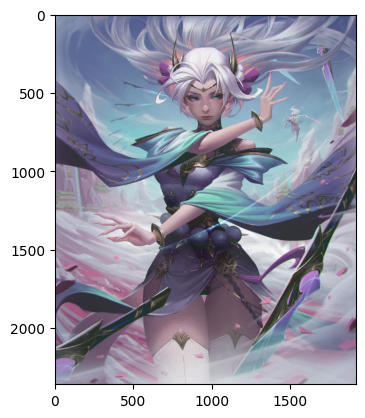

In [51]:
print(type(img))
print(img.shape)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

Trong đó qua (1920, 1920) ta có thể hiểu được độ dài của ảnh 1920, độ rộng 1920 ( pixel/ điểm ảnh)

**LẤY KÍCH THƯỚC CỦA ẢNH**

In [52]:
(h, w, d) = img.shape
print("width={}, height={}, depth={}".format(w, h, d))

width=1920, height=2359, depth=3


**LẤY GIÁ TRỊ MÀU Ở MỘT ĐIỂM ẢNH**

In [53]:
#Ta lấy pixel/điểm ảnh tại vị trí w=50, h=50, d=0
(B, G, R) = img[50, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=125, G=141, B=166


**XOAY ẢNH THEO CHIỀU DỌC**

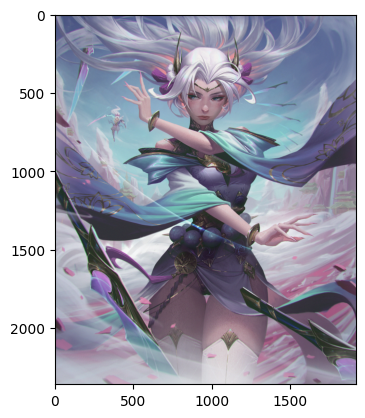

In [54]:
result_ver = img_rgb[:, ::-1]
plt.imshow(result_ver, cmap='gray')
plt.show()

**XOAY ẢNH THEO ĐƯỜNG CHÉO CHÍNH**

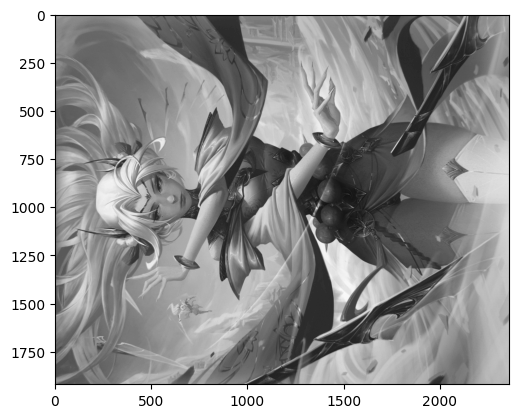

In [55]:
result_dia = cv2.imread('test.jpg',0).transpose()
plt.imshow(result_dia,cmap='gray')
plt.show()

**XOAY ẢNH THEO CHIỀU NGANG**

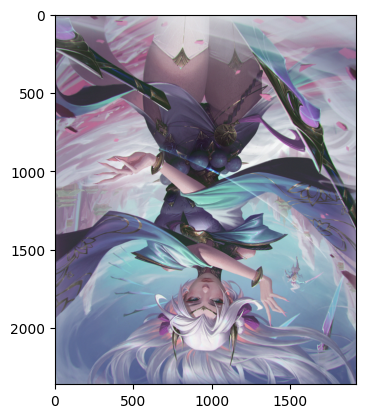

In [56]:
result_hor = img_rgb[::-1, :]
plt.imshow(result_hor,cmap='gray')
plt.show()

**ĐIỀU CHỈNH ĐỘ SÁNG TỐI CỦA ẢNH**

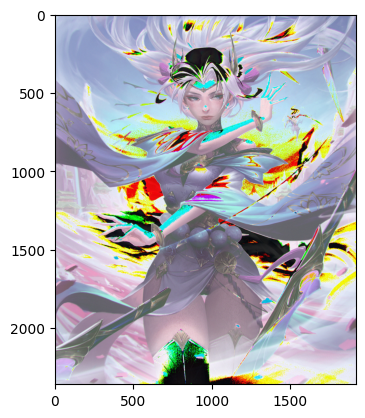

In [57]:
# Copy lại ảnh gốc ( tránh mất ảnh sau khi chỉnh sửa xong)
result = img_rgb.copy()
# Tăng độ sáng ảnh lên 50 đơn vị
result = result + 50
# In ảnh đã qua chỉnh sửa.
plt.imshow(result, cmap='gray')
plt.show()

**ĐỔI MÀU MỘT VÙNG ẢNH**

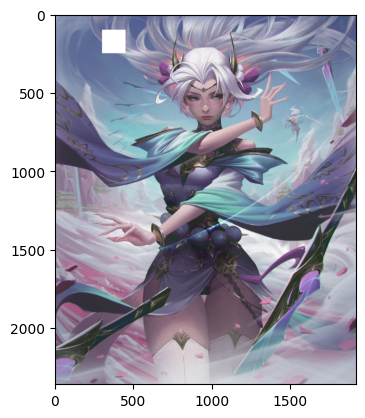

In [58]:
result = img_rgb.copy()
result[100:250, 300:450] = 255
plt.imshow(result,cmap='gray')
plt.show()

**Canny edge detection**

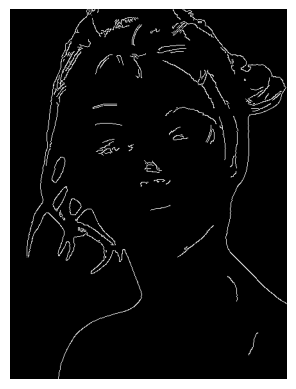

In [12]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('mask.png', 0)
edges = cv2.Canny(img, 100, 200)
cv2.imwrite('test-edge.png', edges)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


**Vẽ countour của ảnh**

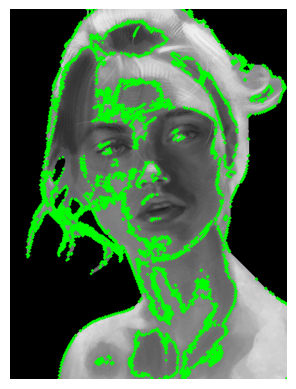

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('mask.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
for contour in contours:
    cv2.drawContours(img, contour, -1, (0, 255, 0), 3)

cv2.imwrite('countour-test.png', img)
plt.imshow(img)
plt.axis("off")
plt.show()

**HIỆU ỨNG ẢNH - Image Animation**

ĐỌC ẢNH

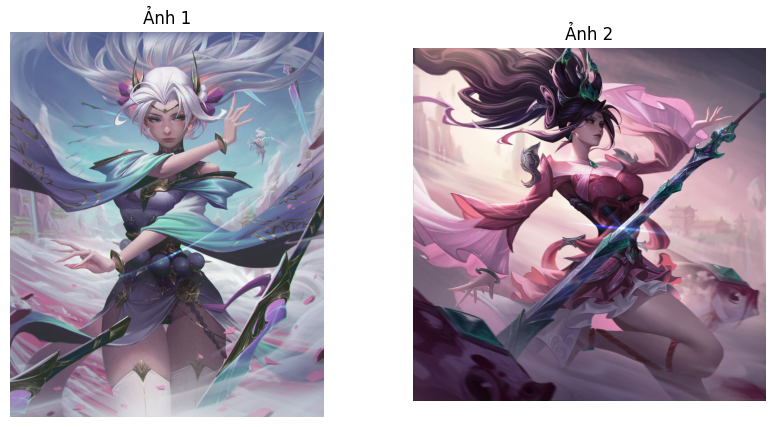

In [59]:
# Đọc ảnh
image1 = cv2.imread('test.jpg')
image2 = cv2.imread('test1.jpg')

# Chuyển đổi từ không gian màu BGR (OpenCV) sang RGB (matplotlib)
img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh sử dụng matplotlib
plt.figure(figsize=(10, 5))

# Hiển thị ảnh 1
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Ảnh 1')
plt.axis('off')

# Hiển thị ảnh 2
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Ảnh 2')
plt.axis('off')

plt.show()

CHUẨN HOÁ KÍCH THƯỚC ẢNH: Để chọn được các ảnh với nhau thì cả 2 ảnh phải có chung một kích thước. Để thay đổi kích thước ảnh, ta sử dụng hàm `cv2.resize()` với cú pháp như sau:

In [60]:
# Lấy kích thước của ảnh:
h1,w1,c1 = img1.shape
h2,w2,c2 = img2.shape

# Lưu vào h chiều cao, w chiều rộng nhỏ nhất giữa 2 ảnh:
h=min(h1,h2)
w=min(w1,w2)

# Thay đổi kích thước ảnh theo w,h:
img1 = cv2.resize(img1,(w,h))
img2 = cv2.resize(img2,(w,h))

**Hiệu ứng Cover:** Các giá trị điểm ảnh dần được thay thế bởi những giá trị của điểm ảnh bên phải điểm ảnh bị thay thế, những giá trị ảnh bị dư ra bởi việc thay thế điểm ảnh sẽ nhận giá trị của ảnh thứ 2 bằng cách tương tự.

In [61]:
Speed = 10
import imageio

In [62]:
# Vì range(0,w) nó chỉ lấy giá trị từ 0->w-1
# Nếu muốn hiệu ứng diễn ra nhanh hơn thì có thể thay:
# - range(0,w+1)->range(0,w+1,Speed),
# - Speed càng lớn thì ảnh hiện càng nhanh
results=[]
for D in range(0,w+1,Speed):
    result=img1.copy()
    # Code trình diễn ảnh
    result[:,0:w-D,:] = img1[:,D:w,:]
    result[:,w-D:w,:] = img2[:,0:D,:]
    # Tạo gif
    results.append(result)
# Lưu gif
imageio.mimsave('Cover.gif', results)

**Hiệu ứng Comb:**  Cách thực hiện giống như hiệu ứng COVER, tuy nhiên sự khác biệt ở đây là xem kẽ hiệu ứng COVER FORM LEFT và COVER FROM RIGHT theo chiều cao.

In [63]:
Line = 6 # Chia ra thành 6 dòng
h1 = h1 // Line
results=[]
for D in range(0, w + 1, Speed):
    for L in range(0, Line,2):
        result[h1*L:h1*(L+1), 0:D, :] = img1[h1*L:h1*(L+1), w - D:w, :]
        result[h1*L:h1*(L+1), D:w, :] = img2[h1*L:h1*(L+1), 0:w - D]
        result[h1*(L+1):h1*(L+2), 0:w - D, :] = img2[h1*(L+1):h1*(L+2), D:w, :]
        result[h1*(L+1):h1*(L+2), w - D:w, :] = img1[h1*(L+1):h1*(L+2), 0:D, :]
    results.append(result.copy())
# Lưu gif
imageio.mimsave('Comb.gif', results)


**TRỘN ẢNH - Image Blending**

Kich thuoc theo tung kenh cua foreground:  (750, 560, 3)
Kich thuoc theo tung kenh cua eff:  (720, 1280, 3)
Kich thuoc theo tung kenh cua mask:  (578, 432, 4)


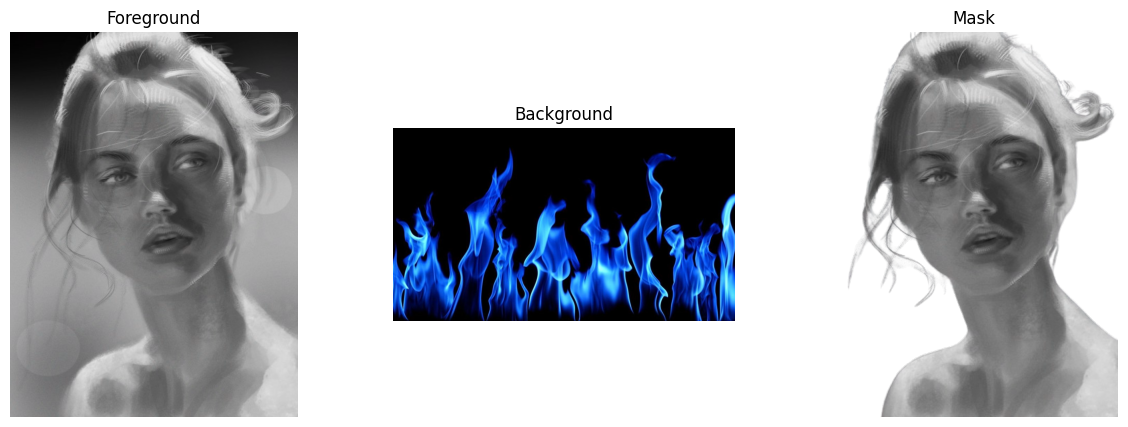

In [64]:
# Đọc ảnh foreground
fg = cv2.imread('fg.jpg')
print('Kich thuoc theo tung kenh cua foreground: ', fg.shape)

# Đọc ảnh effect
eff = cv2.imread('eff.jpg')
print('Kich thuoc theo tung kenh cua eff: ', eff.shape)

# Đọc ảnh mask
mask = cv2.imread('mask.png', cv2.IMREAD_UNCHANGED)
print('Kich thuoc theo tung kenh cua mask: ', mask.shape)

# Hiển thị ảnh sử dụng matplotlib
plt.figure(figsize=(15, 5))

# Hiển thị ảnh Foreground
plt.subplot(1, 3, 1)
plt.imshow(fg)
plt.title('Foreground')
plt.axis('off')

# Hiển thị ảnh Background
plt.subplot(1, 3, 2)
plt.imshow(eff)
plt.title('Background')
plt.axis('off')

# Hiển thị ảnh Mask
plt.subplot(1, 3, 3)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.show()

In [65]:
# Lấy kích thước của ảnh:
h1,w1,c1 = fg.shape
h2,w2,c2 = eff.shape
h3,w3,c3 = mask.shape

# Lưu vào h chiều cao, w chiều rộng nhỏ nhất giữa 2 ảnh:
h=min(h1,min(h2,h3))
w=min(w1,min(w2, w3))

# Thay đổi kích thước ảnh theo w,h:
fg = cv2.resize(fg,(w,h))
eff = cv2.resize(eff,(w,h))
mask = cv2.resize(mask,(w,h))

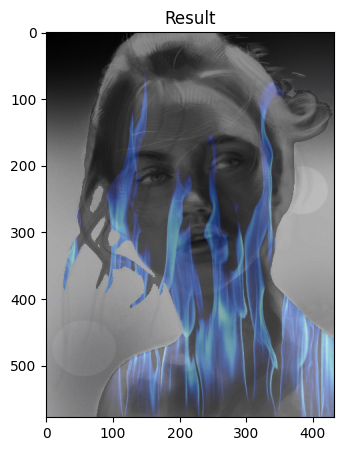

In [66]:
#Sao chép ảnh qua biến mới
result = fg.copy()
alpha = 0.6
for x in range(mask.shape[0]): # result.shape[0]: chiều cao ảnh
    for y in range(mask.shape[1]): # result.shape[1]: chiều rộng ảnh
        if (mask[x,y,3] != 0): # Kiểm tra điểm ảnh
            result[x,y] = (alpha * fg[x,y] + (1 - alpha) * eff[x,y])

# Hiển thị ảnh sử dụng matplotlib
plt.figure(figsize=(10, 5))

# Hiển thị ảnh Result
plt.imshow(result)
plt.title('Result')

plt.show()